Fraunhofer Diffraction - Circular Aperture


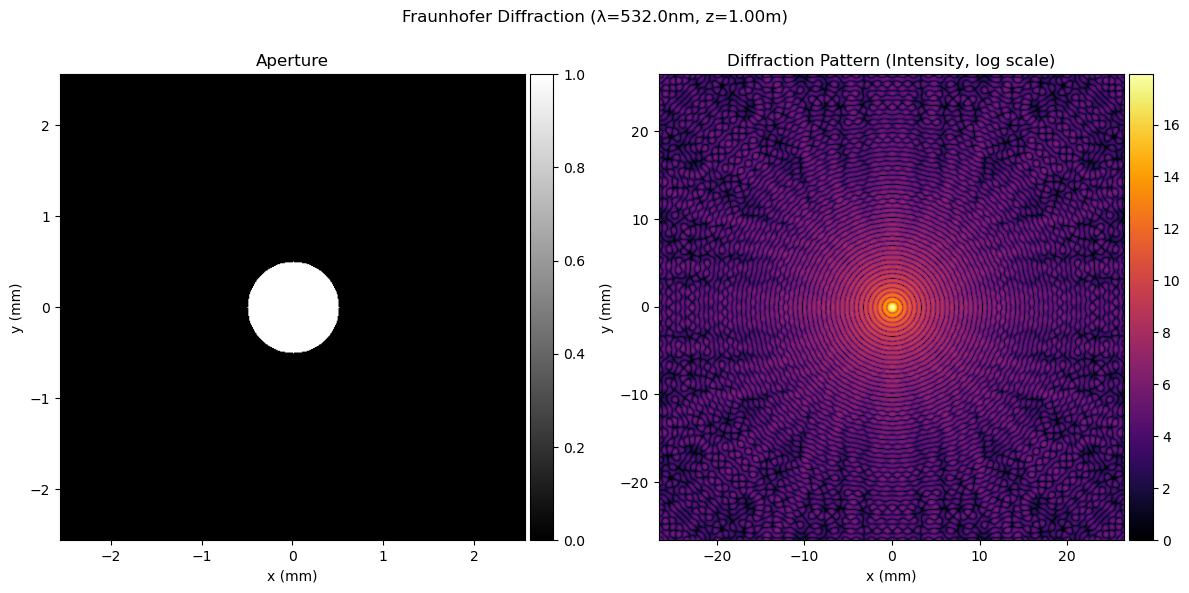

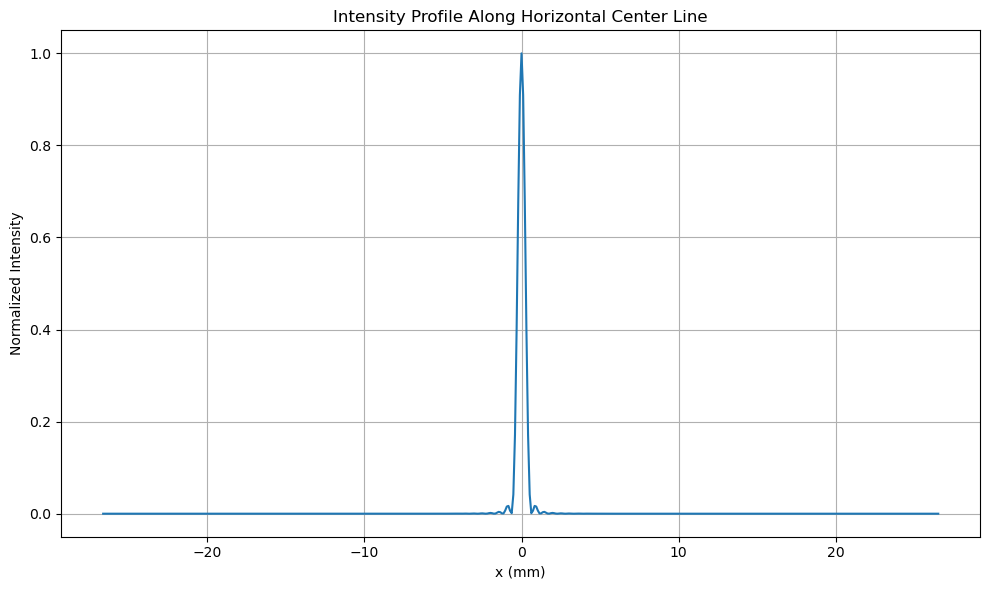


Fraunhofer Diffraction - Rectangular Aperture


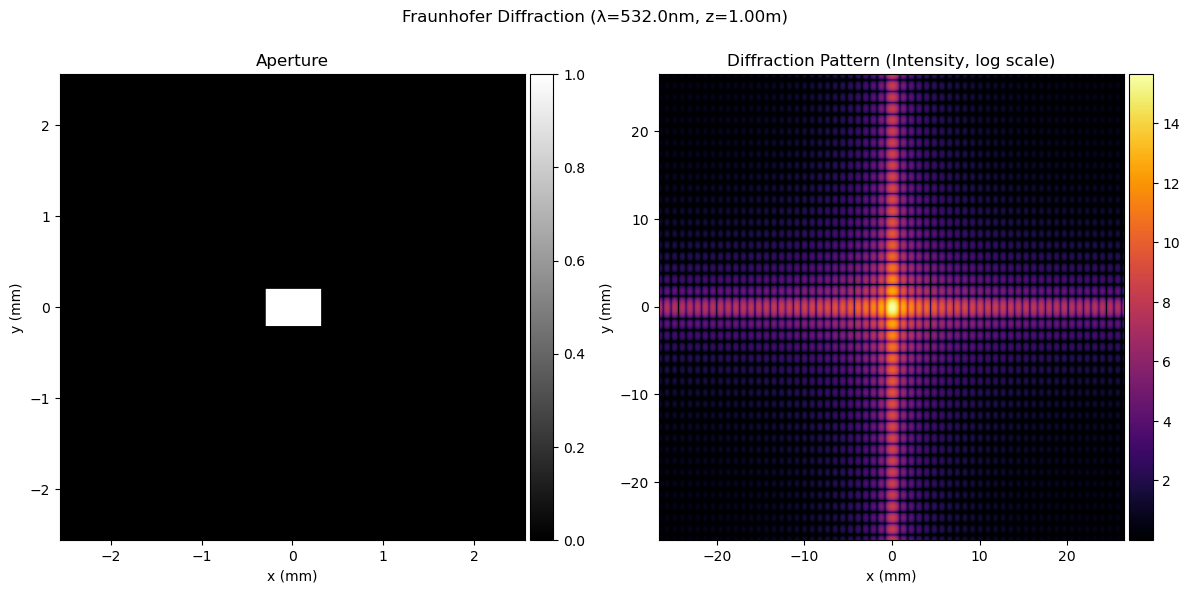

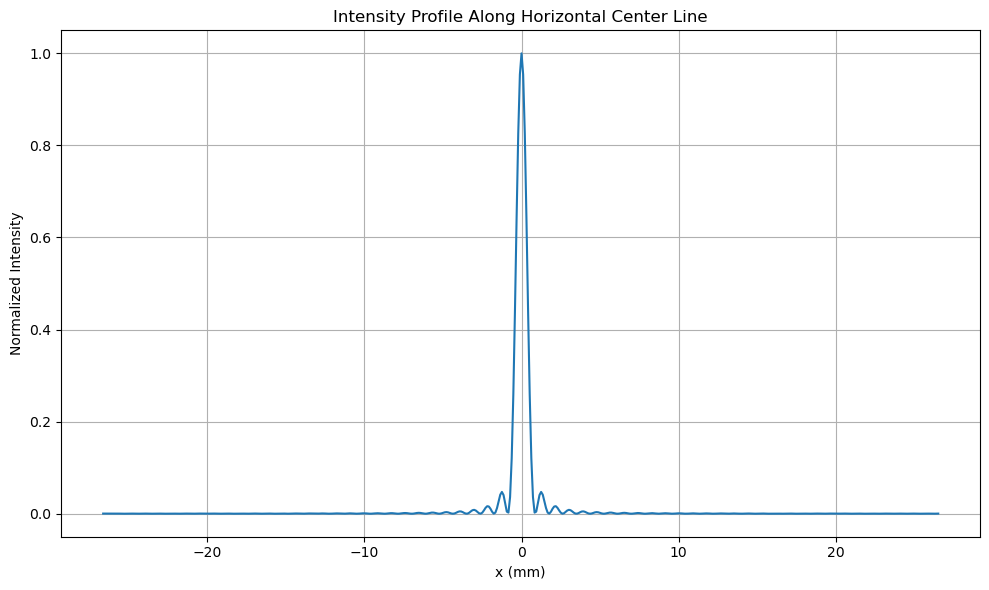


Fraunhofer Diffraction - Single Slit


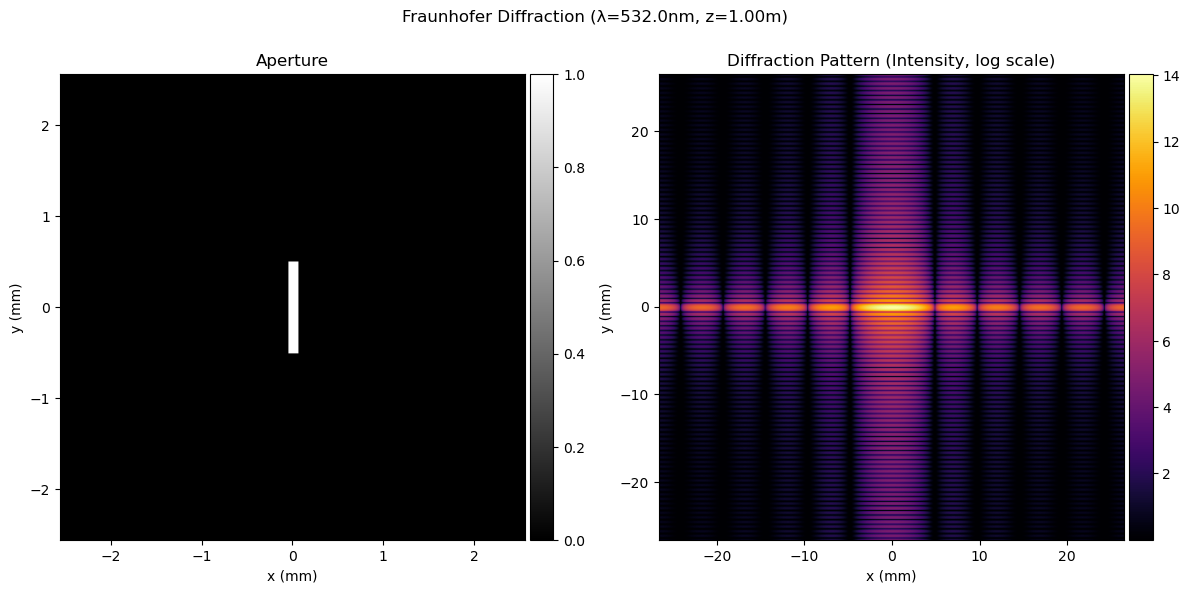

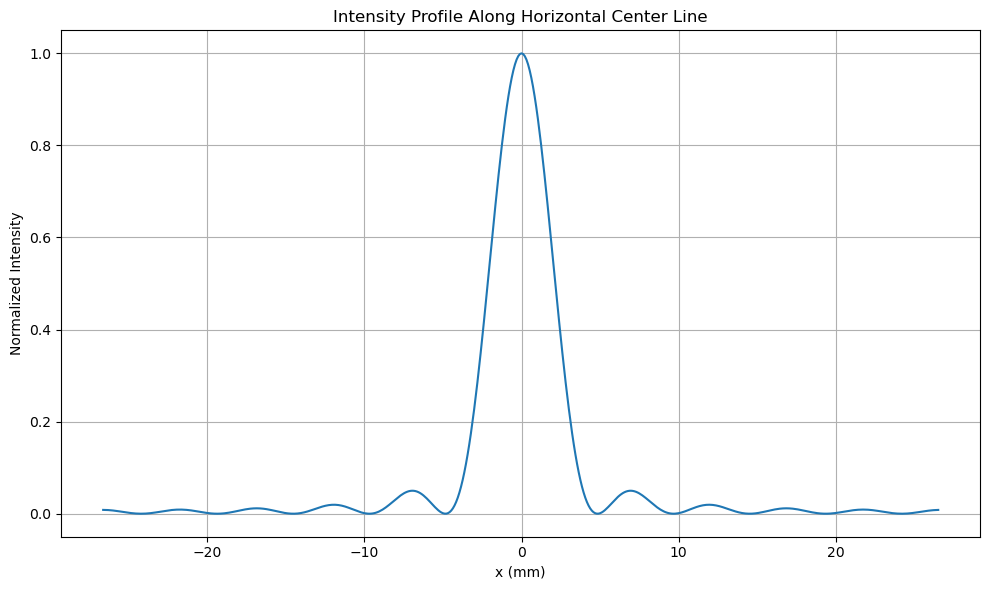


Fraunhofer Diffraction - Double Slit


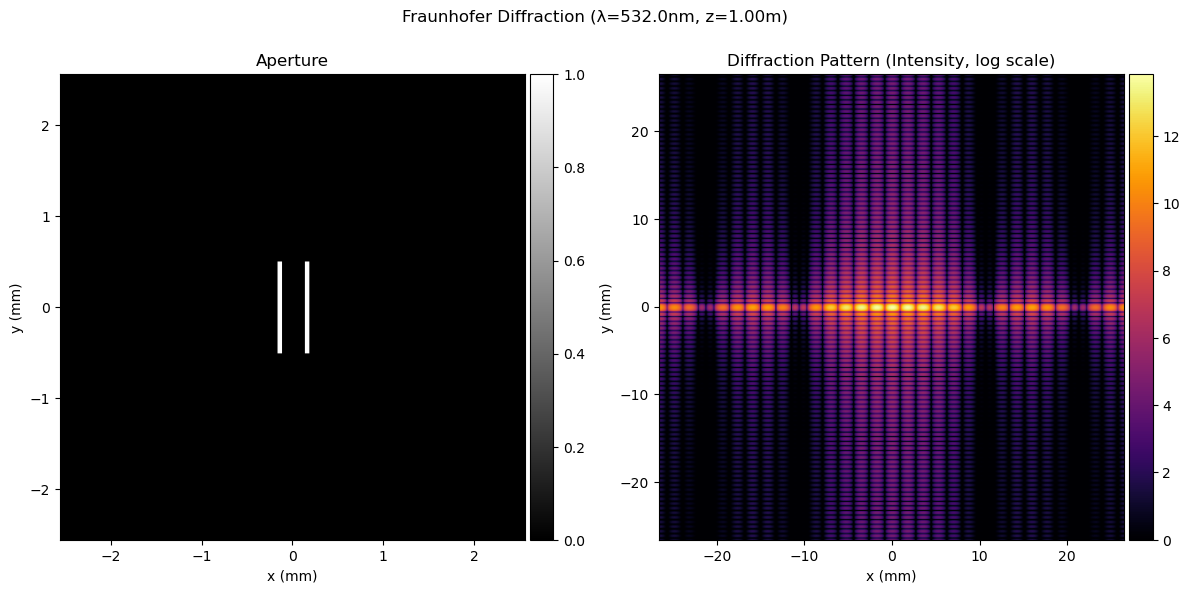

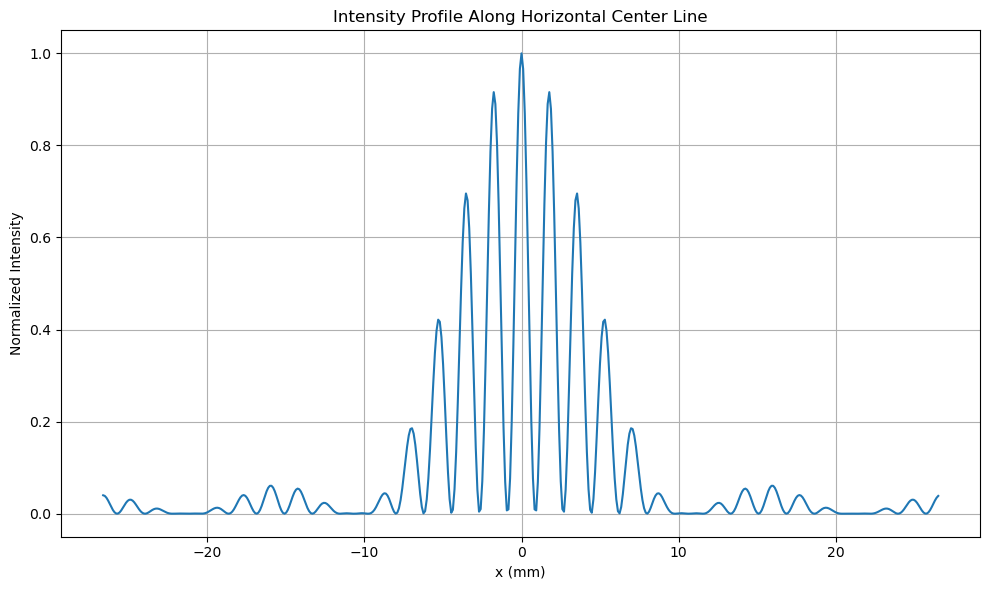


Airy Disk Demonstration


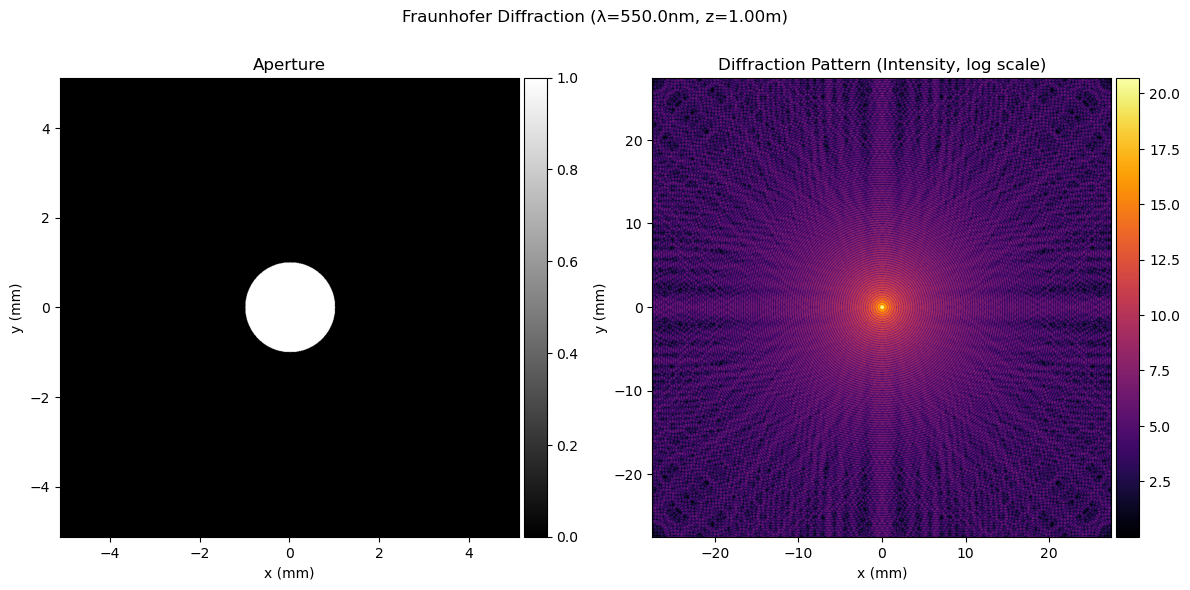

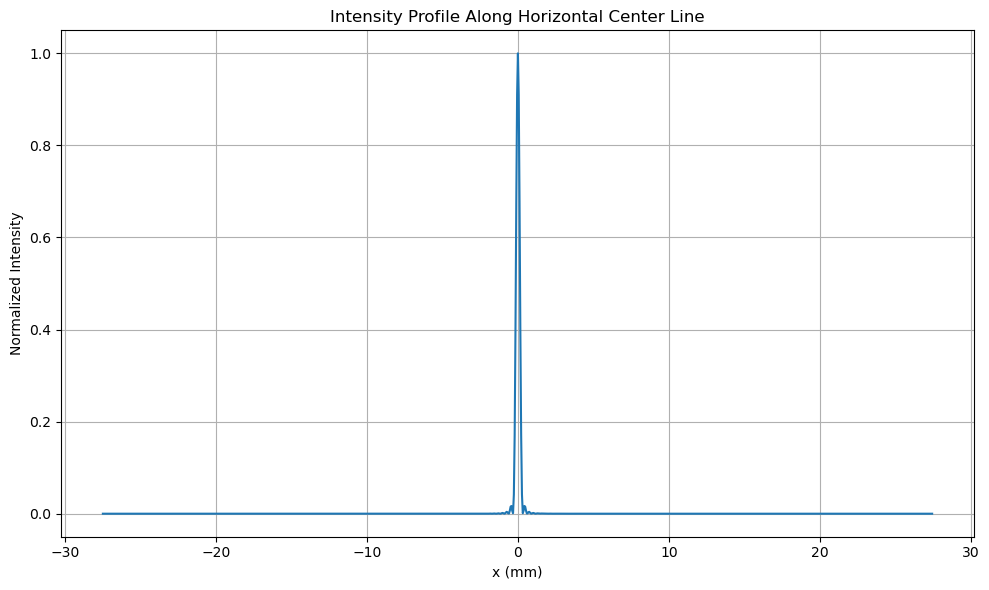

Theoretical angular resolution (Rayleigh criterion): 335.500 microradians
Theoretical resolution at focal plane: 335.500 micrometers


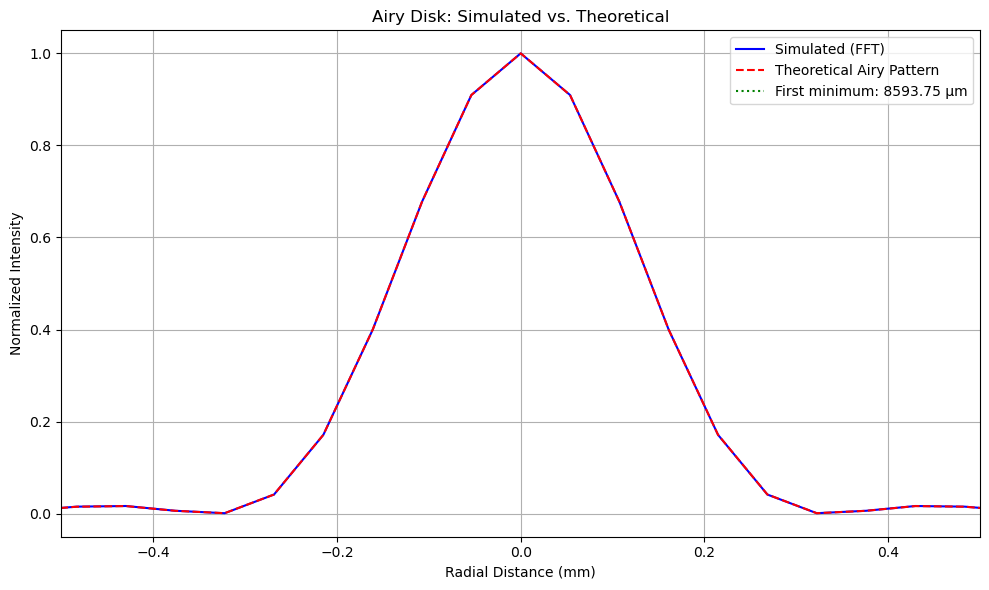


Fresnel Diffraction - Circular Aperture


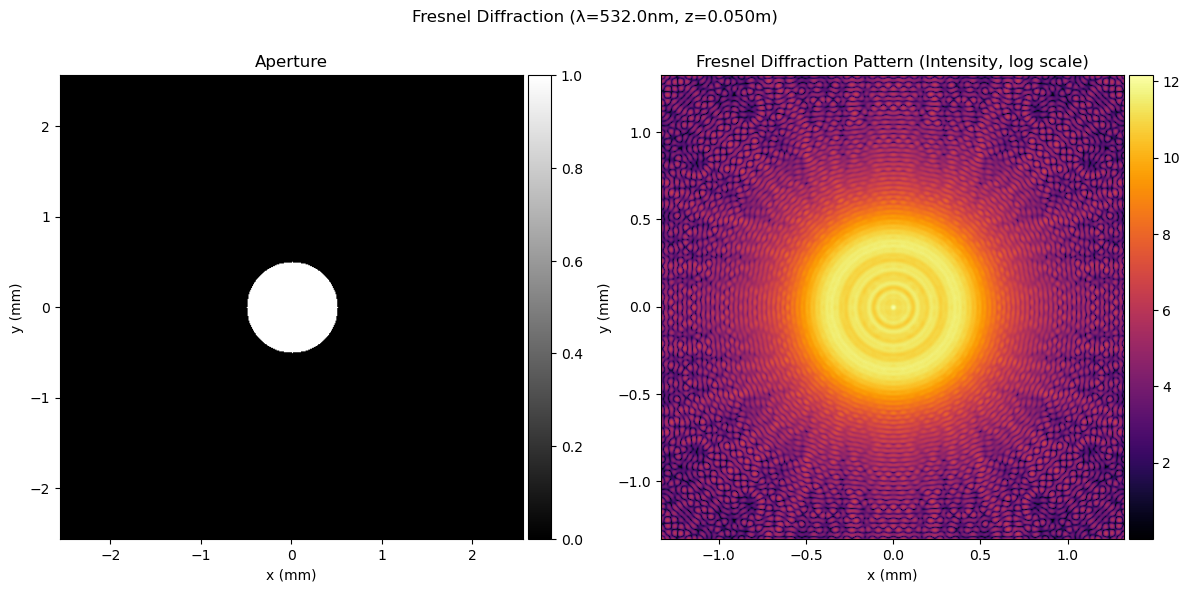

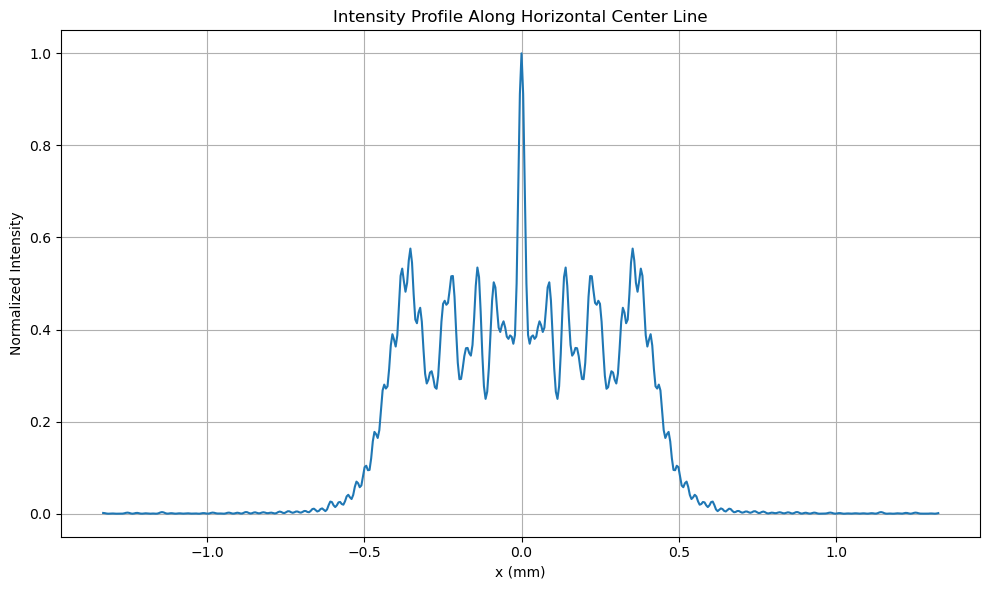


Near to Far Field Transition


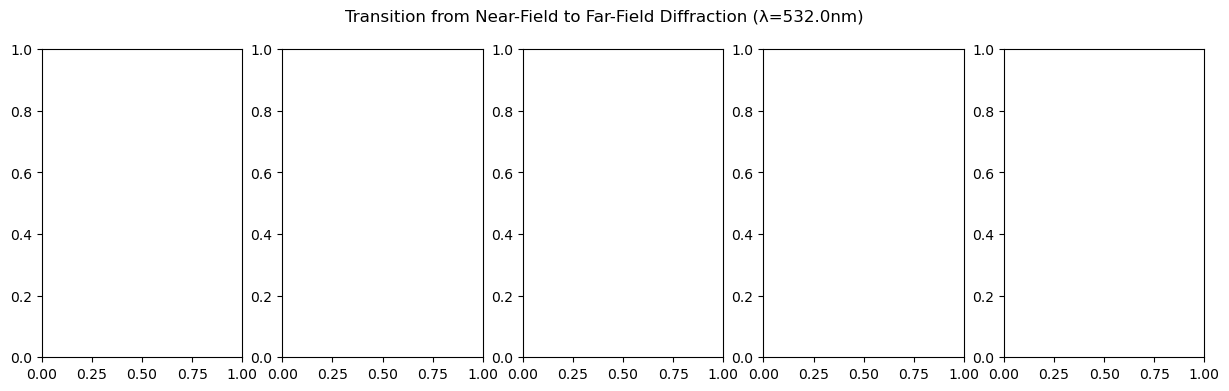

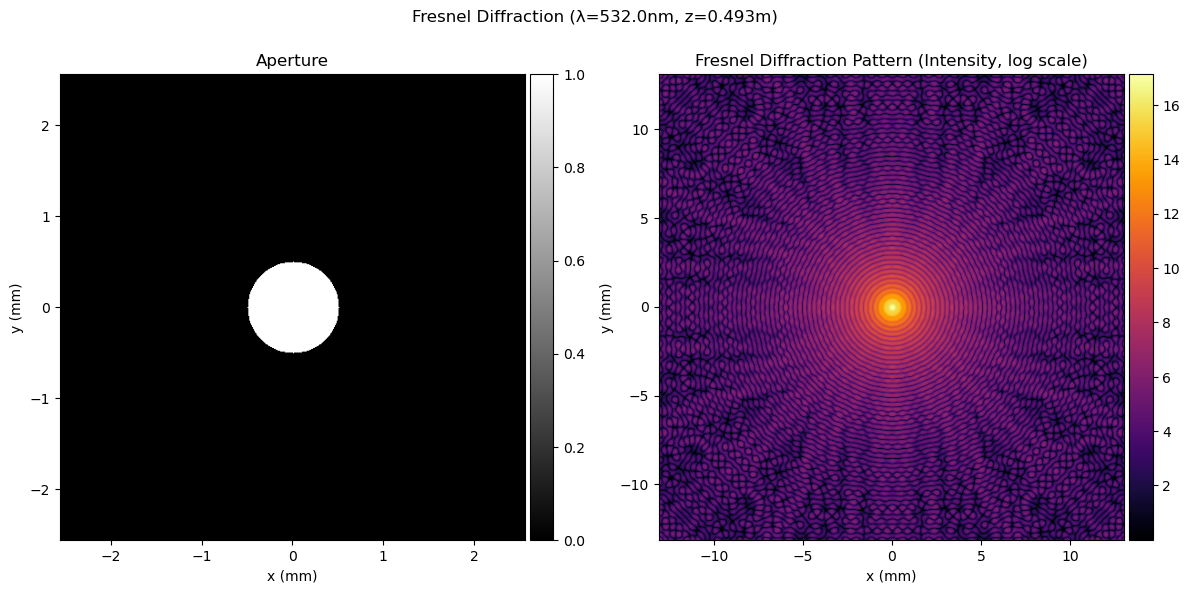

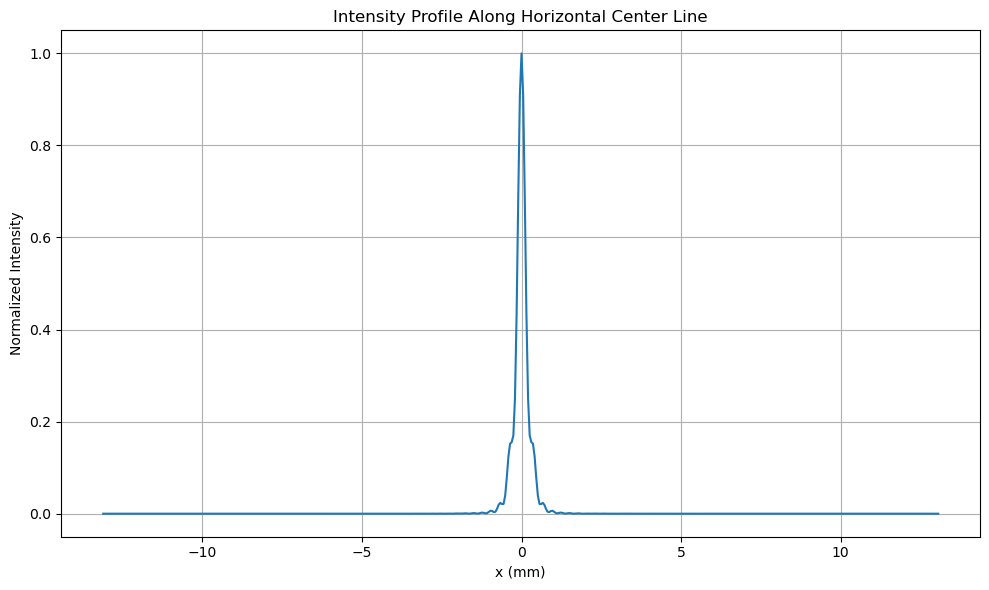

<Figure size 640x480 with 0 Axes>

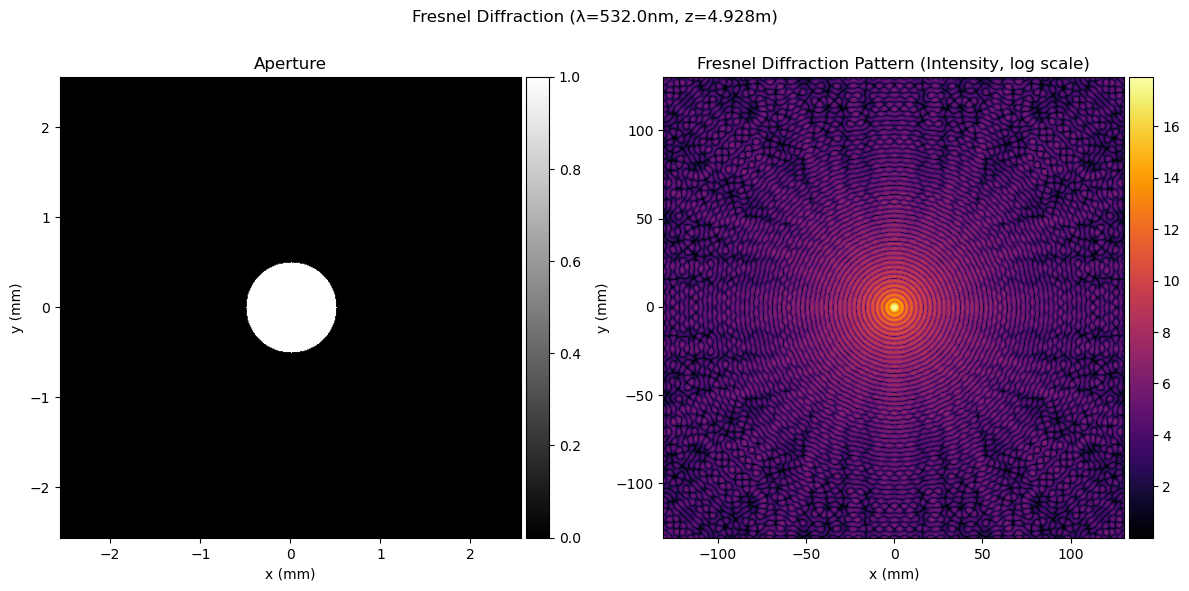

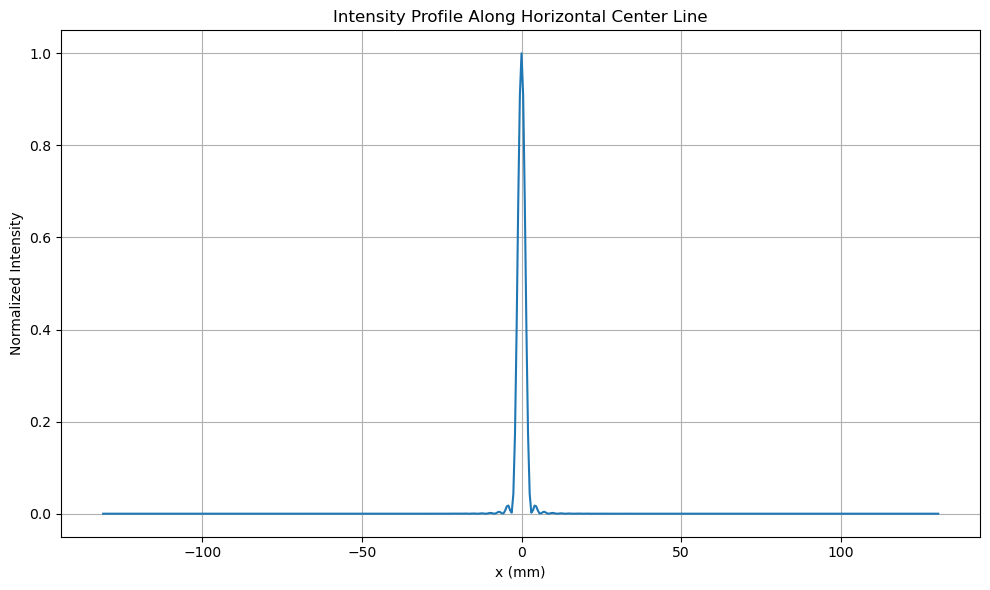

<Figure size 640x480 with 0 Axes>

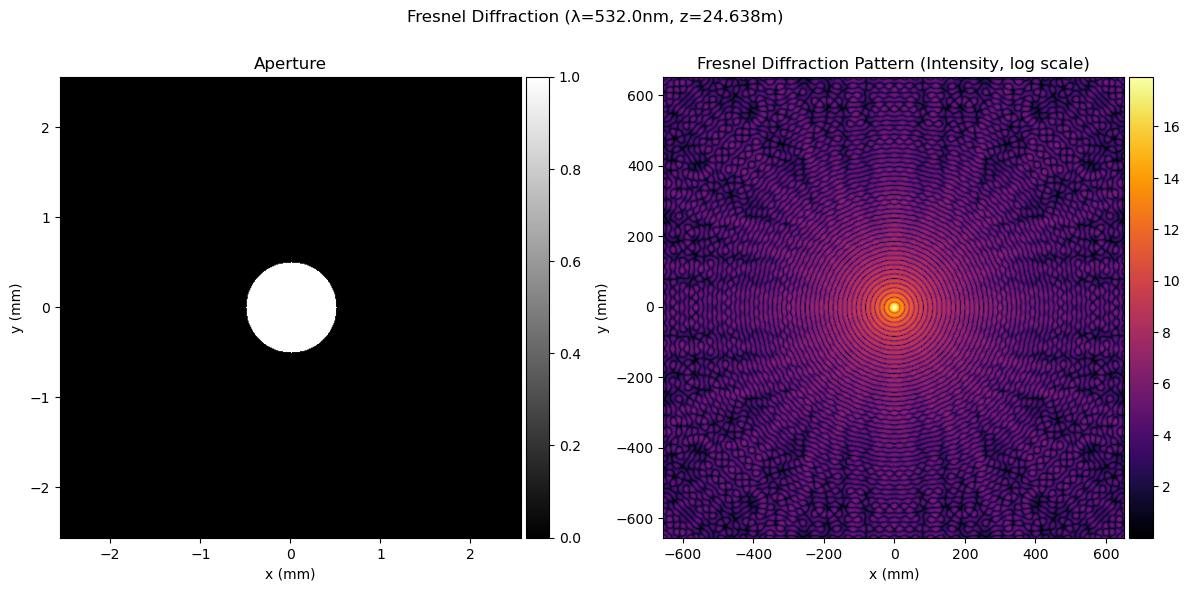

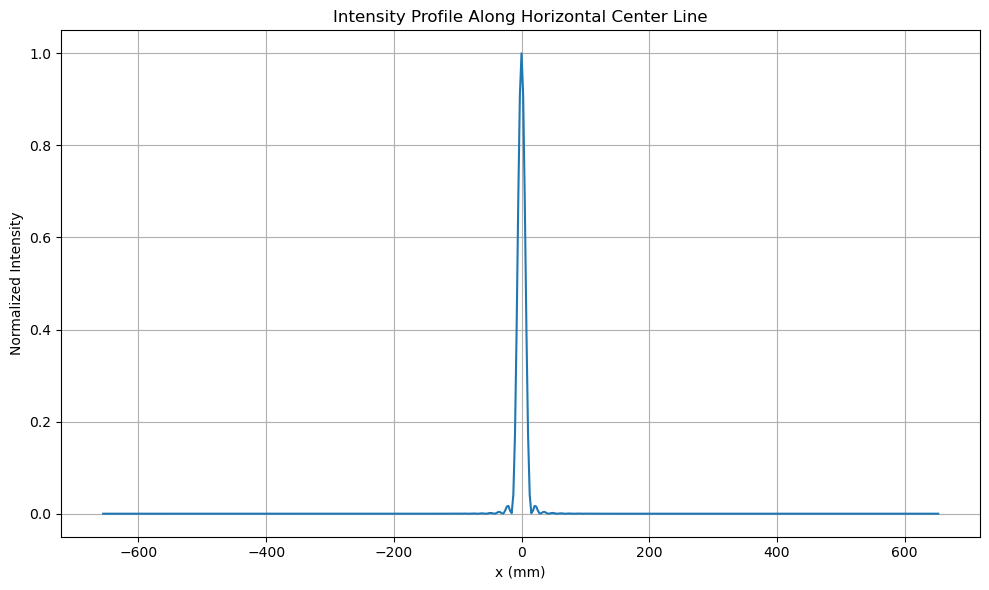

<Figure size 640x480 with 0 Axes>

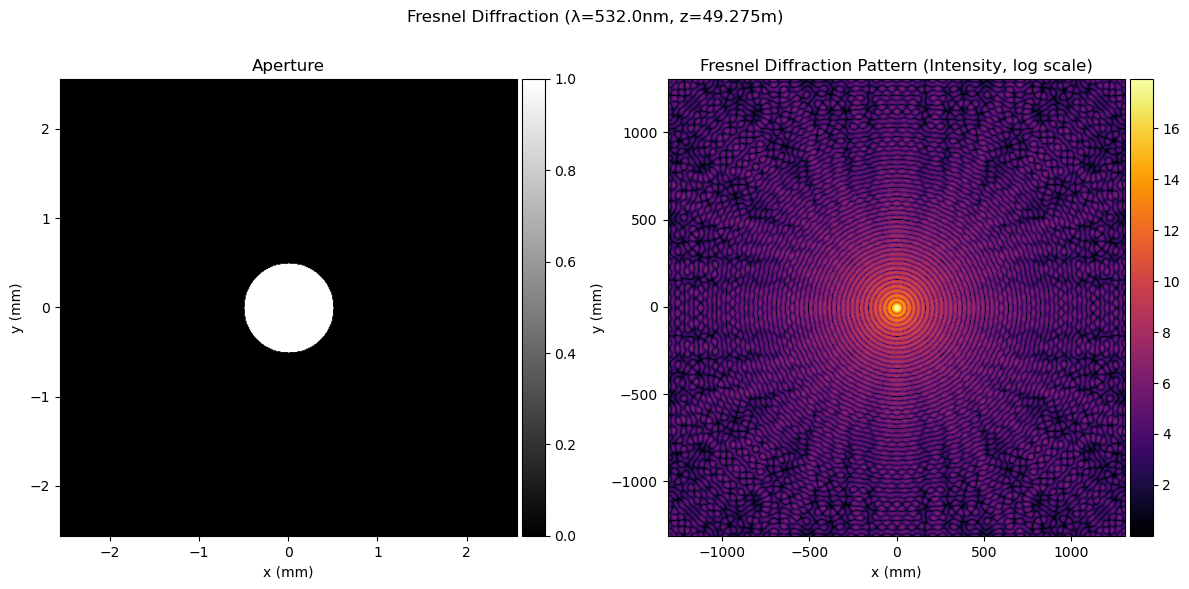

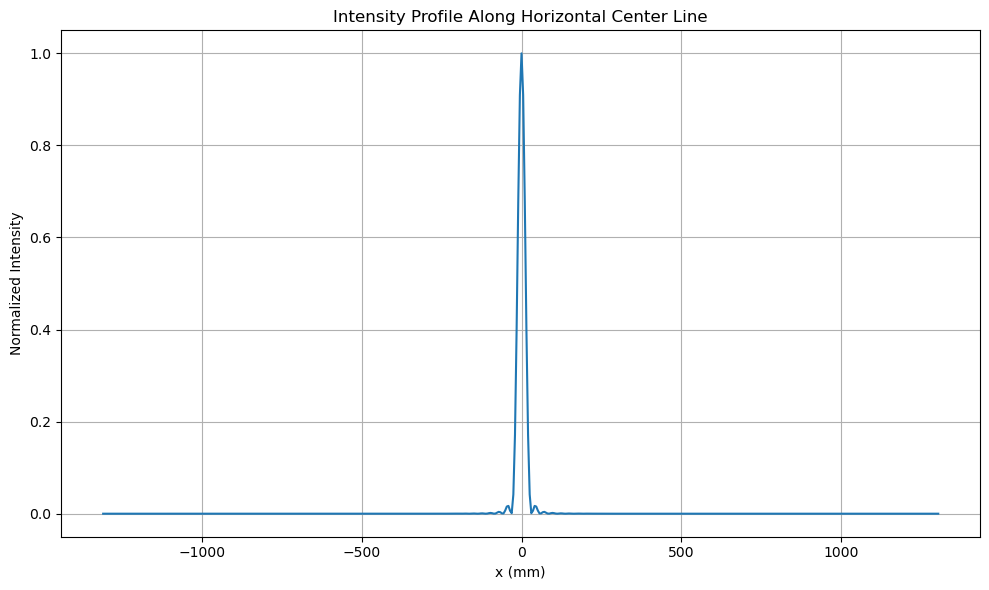

<Figure size 640x480 with 0 Axes>

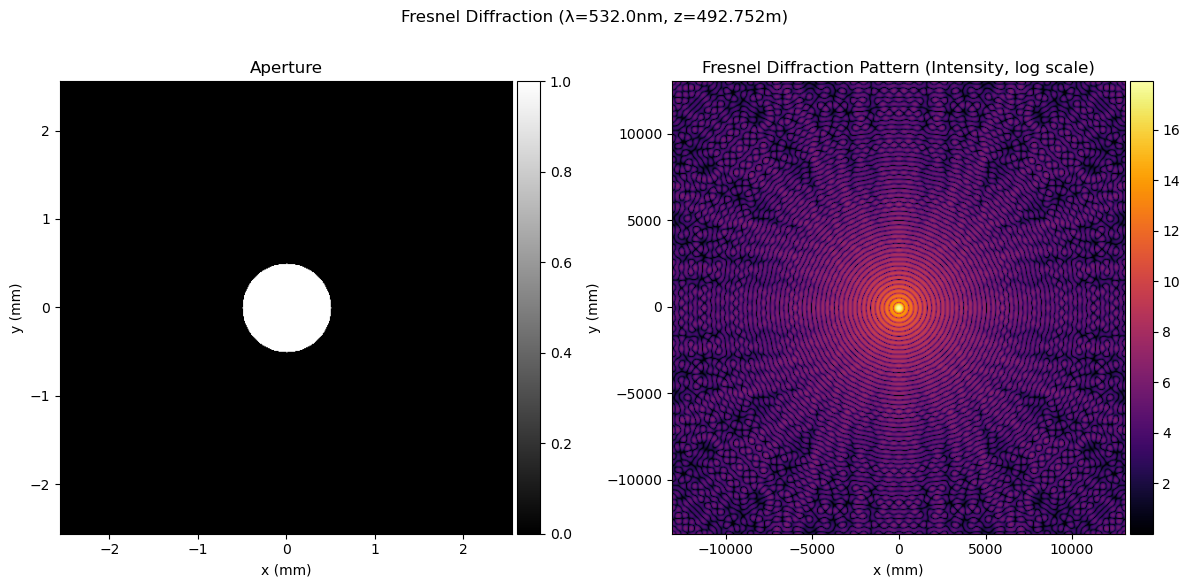

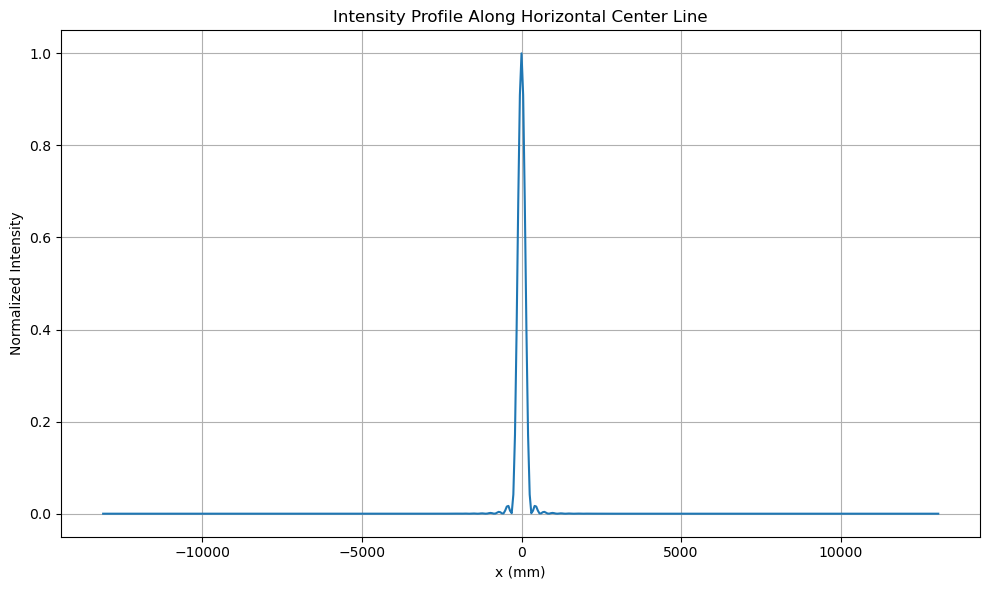

<Figure size 640x480 with 0 Axes>

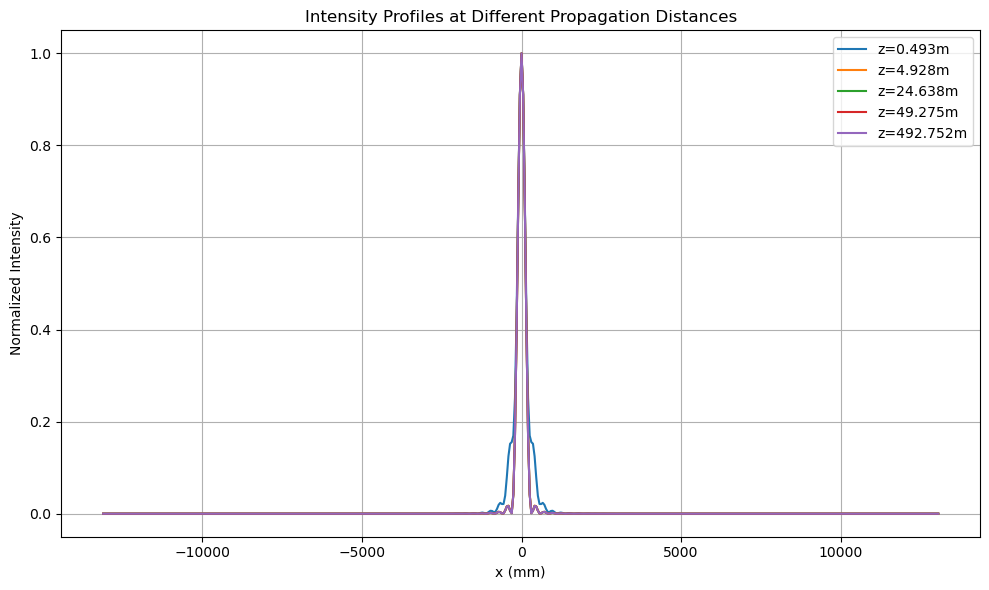


Diffraction-Limited Imaging


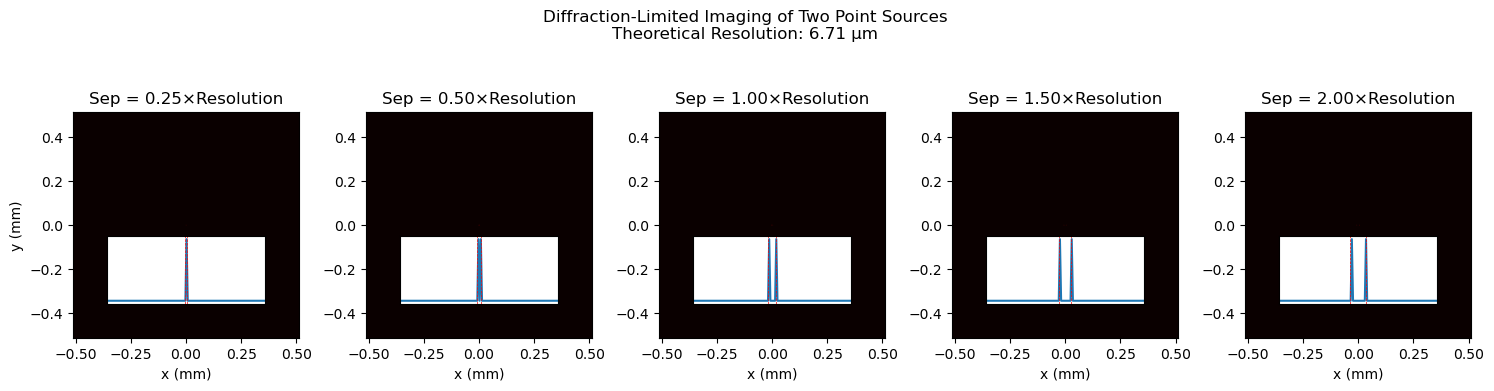

In [8]:
"""diffraction_imaging.py - Diffraction-based imaging concepts in Fourier Optics

This module demonstrates fundamental diffraction concepts in Fourier Optics,
including Fraunhofer diffraction, Fresnel diffraction, and their applications
in optical imaging systems.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.fftpack as fft
from scipy.special import j1  # Bessel function of first kind of order 1
from mpl_toolkits.axes_grid1 import make_axes_locatable

def demonstrate_fraunhofer_diffraction(aperture, wl=532e-9, z=1.0, pixel_size=10e-6):
    """
    Demonstrate Fraunhofer diffraction pattern calculation.
    
    Fraunhofer diffraction occurs in the far field, where the observation
    distance is much larger than the aperture size. It can be calculated
    as the Fourier transform of the aperture function.
    
    Parameters:
    -----------
    aperture : 2D numpy array
        The aperture function (transmission function)
    wl : float
        Wavelength of light in meters (default: 532nm - green light)
    z : float
        Distance to observation plane in meters
    pixel_size : float
        Size of each pixel in the aperture in meters
    """
    # Get aperture dimensions
    Ny, Nx = aperture.shape
    
    # Calculate the Fraunhofer diffraction pattern
    # For Fraunhofer diffraction, the pattern is proportional to the Fourier transform of the aperture
    diffraction_pattern = fft.fftshift(fft.fft2(fft.ifftshift(aperture)))
    
    # Calculate the intensity (squared magnitude)
    intensity = np.abs(diffraction_pattern)**2
    
    # Calculate spatial frequencies
    fx = fft.fftshift(fft.fftfreq(Nx, d=pixel_size))
    fy = fft.fftshift(fft.fftfreq(Ny, d=pixel_size))
    
    # Calculate positions in the observation plane
    x_obs = fx * wl * z
    y_obs = fy * wl * z
    
    # Create meshgrid for observation plane
    X_obs, Y_obs = np.meshgrid(x_obs, y_obs)
    
    # Calculate radial distance from center
    R_obs = np.sqrt(X_obs**2 + Y_obs**2)
    
    # Plot the aperture and its diffraction pattern
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Fraunhofer Diffraction (λ={wl*1e9:.1f}nm, z={z:.2f}m)")
    
    # Plot the aperture
    im1 = axs[0].imshow(aperture, cmap='gray', extent=[-Nx*pixel_size/2*1000, Nx*pixel_size/2*1000, 
                                                      -Ny*pixel_size/2*1000, Ny*pixel_size/2*1000])
    axs[0].set_title('Aperture')
    axs[0].set_xlabel('x (mm)')
    axs[0].set_ylabel('y (mm)')
    
    divider = make_axes_locatable(axs[0])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)
    
    # Plot the diffraction pattern (log scale for better visualization)
    # Calculate extent in mm for the observation plane
    x_extent = 1000 * np.array([x_obs[0], x_obs[-1]])
    y_extent = 1000 * np.array([y_obs[0], y_obs[-1]])
    extent_obs = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
    
    im2 = axs[1].imshow(np.log1p(intensity), cmap='inferno', extent=extent_obs)
    axs[1].set_title('Diffraction Pattern (Intensity, log scale)')
    axs[1].set_xlabel('x (mm)')
    axs[1].set_ylabel('y (mm)')
    
    divider = make_axes_locatable(axs[1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)
    
    plt.tight_layout()
    plt.show()
    
    # Plot intensity profile through center
    center_idx = Ny // 2
    intensity_profile = intensity[center_idx, :]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_obs * 1000, intensity_profile / np.max(intensity_profile))
    plt.xlabel('x (mm)')
    plt.ylabel('Normalized Intensity')
    plt.title('Intensity Profile Along Horizontal Center Line')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return intensity, x_obs, y_obs

def create_circular_aperture(size, radius, center=None):
    """
    Create a circular aperture.
    
    Parameters:
    -----------
    size : int
        Size of the aperture array (pixels)
    radius : float
        Radius of the circular aperture (pixels)
    center : tuple of float, optional
        Center position of the aperture (pixels)
        
    Returns:
    --------
    2D numpy array
        The circular aperture
    """
    if center is None:
        center = (size // 2, size // 2)
    
    y, x = np.ogrid[:size, :size]
    dist_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    
    mask = dist_from_center <= radius
    aperture = np.zeros((size, size))
    aperture[mask] = 1.0
    
    return aperture

def create_rectangular_aperture(size, width, height, center=None, angle=0):
    """
    Create a rectangular aperture, optionally rotated.
    
    Parameters:
    -----------
    size : int
        Size of the aperture array (pixels)
    width : float
        Width of the rectangle (pixels)
    height : float
        Height of the rectangle (pixels)
    center : tuple of float, optional
        Center position of the aperture (pixels)
    angle : float, optional
        Rotation angle in degrees
        
    Returns:
    --------
    2D numpy array
        The rectangular aperture
    """
    if center is None:
        center = (size // 2, size // 2)
    
    aperture = np.zeros((size, size))
    
    # Create meshgrid
    y, x = np.ogrid[:size, :size]
    x = x - center[0]
    y = y - center[1]
    
    if angle != 0:
        # Rotate coordinates
        angle_rad = np.deg2rad(angle)
        x_rot = x * np.cos(angle_rad) + y * np.sin(angle_rad)
        y_rot = -x * np.sin(angle_rad) + y * np.cos(angle_rad)
        x, y = x_rot, y_rot
    
    # Create rectangle mask
    mask = (np.abs(x) <= width / 2) & (np.abs(y) <= height / 2)
    aperture[mask] = 1.0
    
    return aperture

def create_slit_aperture(size, width, length, center=None, angle=0):
    """
    Create a slit aperture (thin rectangle), optionally rotated.
    
    Parameters:
    -----------
    size : int
        Size of the aperture array (pixels)
    width : float
        Width of the slit (pixels)
    length : float
        Length of the slit (pixels)
    center : tuple of float, optional
        Center position of the aperture (pixels)
    angle : float, optional
        Rotation angle in degrees
        
    Returns:
    --------
    2D numpy array
        The slit aperture
    """
    # A slit is just a thin rectangular aperture
    return create_rectangular_aperture(size, width, length, center, angle)

def create_double_slit_aperture(size, slit_width, slit_length, separation, center=None, angle=0):
    """
    Create a double-slit aperture, optionally rotated.
    
    Parameters:
    -----------
    size : int
        Size of the aperture array (pixels)
    slit_width : float
        Width of each slit (pixels)
    slit_length : float
        Length of each slit (pixels)
    separation : float
        Center-to-center separation between slits (pixels)
    center : tuple of float, optional
        Center position of the aperture (pixels)
    angle : float, optional
        Rotation angle in degrees
        
    Returns:
    --------
    2D numpy array
        The double-slit aperture
    """
    if center is None:
        center = (size // 2, size // 2)
    
    aperture = np.zeros((size, size))
    
    # Calculate the position of each slit
    slit1_center = (center[0] - separation // 2, center[1])
    slit2_center = (center[0] + separation // 2, center[1])
    
    # Create each slit
    slit1 = create_slit_aperture(size, slit_width, slit_length, slit1_center, angle)
    slit2 = create_slit_aperture(size, slit_width, slit_length, slit2_center, angle)
    
    # Combine the slits
    aperture = slit1 + slit2
    
    # Ensure values are 0 or 1
    aperture = np.clip(aperture, 0, 1)
    
    return aperture

def demonstrate_airy_disk():
    """
    Demonstrate the Airy disk pattern produced by Fraunhofer diffraction from a circular aperture.
    
    The Airy disk is the diffraction pattern produced by light passing through a circular aperture.
    It consists of a bright central disk surrounded by concentric rings.
    """
    # Create a circular aperture
    size = 1024
    radius = 100
    aperture = create_circular_aperture(size, radius)
    
    # Define optical parameters (realistic for a telescope)
    wavelength = 550e-9  # 550 nm (green light)
    aperture_diameter = 2 * radius * 10e-6  # diameter in meters
    focal_length = 1.0  # focal length in meters
    
    # Calculate the theoretical Airy disk pattern
    intensity, x_obs, y_obs = demonstrate_fraunhofer_diffraction(aperture, wavelength, focal_length, 10e-6)
    
    # Calculate the theoretical resolution (Rayleigh criterion)
    # θ = 1.22 * λ / D
    resolution_angle = 1.22 * wavelength / aperture_diameter
    resolution_distance = resolution_angle * focal_length
    
    print(f"Theoretical angular resolution (Rayleigh criterion): {resolution_angle*1e6:.3f} microradians")
    print(f"Theoretical resolution at focal plane: {resolution_distance*1e6:.3f} micrometers")
    
    # Calculate theoretical Airy disk pattern along radial coordinate
    # I(r) = [2*J₁(k*a*sin(θ))/(k*a*sin(θ))]²
    # where k = 2π/λ, a is aperture radius, and sin(θ) ≈ r/f for small angles
    
    # Create proper 2D meshgrid for radial coordinates in the observation plane
    X_obs, Y_obs = np.meshgrid(x_obs, y_obs)
    r = np.sqrt(X_obs**2 + Y_obs**2)
    
    k = 2 * np.pi / wavelength
    a = aperture_diameter / 2
    
    # Avoid division by zero at r=0
    eps = 1e-10
    r_nonzero = np.maximum(r, eps)
    arg = k * a * r_nonzero / focal_length
    
    # Calculate the theoretical Airy pattern (2D)
    airy_pattern = np.zeros_like(r)
    mask = r > 0
    airy_pattern[mask] = (2 * j1(arg[mask]) / arg[mask])**2
    airy_pattern[~mask] = 1.0  # At center, the limit is 1
    
    # Plot a comparison between theoretical and simulated patterns
    center_idx = size // 2
    simulated_profile = intensity[center_idx, :] / np.max(intensity[center_idx, :])
    
    # Extract the horizontal profile through the center of the airy pattern
    airy_1d = airy_pattern[center_idx, :]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_obs * 1000, simulated_profile, 'b-', label='Simulated (FFT)')
    plt.plot(x_obs * 1000, airy_1d, 'r--', label='Theoretical Airy Pattern')
    
    # Mark the first minimum (Airy disk radius)
    # Find the first minimum in the airy pattern after the center point
    center_x_idx = len(x_obs) // 2
    # Look for the first minimum in the right half
    first_zero_idx = center_x_idx + np.argmin(airy_1d[center_x_idx:center_x_idx+size//4])
    first_zero_pos = x_obs[first_zero_idx]
    plt.axvline(x=first_zero_pos * 1000, color='g', linestyle=':', label=f'First minimum: {first_zero_pos*1e6:.2f} μm')
    
    plt.xlabel('Radial Distance (mm)')
    plt.ylabel('Normalized Intensity')
    plt.title('Airy Disk: Simulated vs. Theoretical')
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.5, 0.5)  # Zoom in to the central region
    plt.tight_layout()
    plt.show()
    
    return intensity
    
def demonstrate_fresnel_diffraction(aperture, wl=532e-9, z=0.1, pixel_size=10e-6):
    """
    Demonstrate Fresnel diffraction pattern calculation.
    
    Fresnel diffraction is applicable in the near field, where the observation
    distance is comparable to the aperture size.
    
    Parameters:
    -----------
    aperture : 2D numpy array
        The aperture function (transmission function)
    wl : float
        Wavelength of light in meters (default: 532nm - green light)
    z : float
        Distance to observation plane in meters
    pixel_size : float
        Size of each pixel in the aperture in meters
    """
    # Get aperture dimensions
    Ny, Nx = aperture.shape
    
    # Create coordinate arrays in the aperture plane
    x = np.linspace(-Nx/2, Nx/2-1, Nx) * pixel_size
    y = np.linspace(-Ny/2, Ny/2-1, Ny) * pixel_size
    X, Y = np.meshgrid(x, y)
    
    # Compute the quadratic phase factor in the spatial domain
    k = 2 * np.pi / wl
    phase_factor = np.exp(1j * k / (2 * z) * (X**2 + Y**2))
    
    # Apply the phase factor to the aperture
    field = aperture * phase_factor
    
    # Calculate the Fresnel diffraction pattern using FFT
    field_fft = fft.fftshift(fft.fft2(fft.ifftshift(field)))
    
    # Calculate spatial frequencies
    fx = fft.fftshift(fft.fftfreq(Nx, d=pixel_size))
    fy = fft.fftshift(fft.fftfreq(Ny, d=pixel_size))
    FX, FY = np.meshgrid(fx, fy)
    
    # Apply the quadratic phase factor in the frequency domain
    freq_phase_factor = np.exp(1j * np.pi * z * wl * (FX**2 + FY**2))
    field_diffracted = field_fft * freq_phase_factor
    
    # Calculate coordinate arrays in the observation plane
    x_obs = fx * wl * z
    y_obs = fy * wl * z
    
    # Calculate intensity
    intensity = np.abs(field_diffracted)**2
    
    # Plot the aperture and its diffraction pattern
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Fresnel Diffraction (λ={wl*1e9:.1f}nm, z={z:.3f}m)")
    
    # Plot the aperture
    im1 = axs[0].imshow(aperture, cmap='gray', extent=[-Nx*pixel_size/2*1000, Nx*pixel_size/2*1000, 
                                                      -Ny*pixel_size/2*1000, Ny*pixel_size/2*1000])
    axs[0].set_title('Aperture')
    axs[0].set_xlabel('x (mm)')
    axs[0].set_ylabel('y (mm)')
    
    divider = make_axes_locatable(axs[0])
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)
    
    # Plot the diffraction pattern (log scale for better visualization)
    x_extent = 1000 * np.array([x_obs[0], x_obs[-1]])
    y_extent = 1000 * np.array([y_obs[0], y_obs[-1]])
    extent_obs = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
    
    im2 = axs[1].imshow(np.log1p(intensity), cmap='inferno', extent=extent_obs)
    axs[1].set_title('Fresnel Diffraction Pattern (Intensity, log scale)')
    axs[1].set_xlabel('x (mm)')
    axs[1].set_ylabel('y (mm)')
    
    divider = make_axes_locatable(axs[1])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)
    
    plt.tight_layout()
    plt.show()
    
    # Plot intensity profile through center
    center_idx = Ny // 2
    intensity_profile = intensity[center_idx, :]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_obs * 1000, intensity_profile / np.max(intensity_profile))
    plt.xlabel('x (mm)')
    plt.ylabel('Normalized Intensity')
    plt.title('Intensity Profile Along Horizontal Center Line')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return intensity, x_obs, y_obs

def demonstrate_near_to_far_field_transition(aperture, wl=532e-9, distances=None, pixel_size=10e-6):
    """
    Demonstrate the transition from near-field (Fresnel) to far-field (Fraunhofer) diffraction.
    
    Parameters:
    -----------
    aperture : 2D numpy array
        The aperture function (transmission function)
    wl : float
        Wavelength of light in meters
    distances : list of float, optional
        List of distances to calculate diffraction patterns for
    pixel_size : float
        Size of each pixel in the aperture in meters
    """
    if distances is None:
        # Define distances from near to far field
        aperture_size = aperture.shape[0] * pixel_size
        # Fraunhofer condition: z >> a²/λ where a is aperture size
        fraunhofer_distance = aperture_size**2 / wl
        distances = [0.01 * fraunhofer_distance, 0.1 * fraunhofer_distance,
                    0.5 * fraunhofer_distance, fraunhofer_distance, 10 * fraunhofer_distance]
    
    # Compute diffraction patterns for each distance
    fig, axs = plt.subplots(1, len(distances), figsize=(15, 4))
    fig.suptitle(f"Transition from Near-Field to Far-Field Diffraction (λ={wl*1e9:.1f}nm)")
    
    center_profiles = []
    distance_labels = []
    
    for i, z in enumerate(distances):
        # Use Fresnel diffraction for all distances
        intensity, x_obs, y_obs = demonstrate_fresnel_diffraction(aperture, wl, z, pixel_size)
        
        # Store the central profile for later comparison
        center_idx = aperture.shape[0] // 2
        profile = intensity[center_idx, :] / np.max(intensity[center_idx, :])
        center_profiles.append(profile)
        distance_labels.append(f"z={z:.3f}m")
        
        # Plot the diffraction pattern
        x_extent = 1000 * np.array([x_obs[0], x_obs[-1]])
        y_extent = 1000 * np.array([y_obs[0], y_obs[-1]])
        extent_obs = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
        
        im = axs[i].imshow(np.log1p(intensity), cmap='inferno', extent=extent_obs)
        axs[i].set_title(f"z={z:.3f}m\n{z/fraunhofer_distance:.3f}×(a²/λ)")
        axs[i].set_xlabel('x (mm)')
        
        if i == 0:
            axs[i].set_ylabel('y (mm)')
        
        plt.colorbar(im, ax=axs[i])
        
    plt.tight_layout()
    plt.show()
    
    # Plot the central profiles for comparison
    plt.figure(figsize=(10, 6))
    for i, profile in enumerate(center_profiles):
        plt.plot(x_obs * 1000, profile, label=distance_labels[i])
    
    plt.xlabel('x (mm)')
    plt.ylabel('Normalized Intensity')
    plt.title('Intensity Profiles at Different Propagation Distances')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return center_profiles

def demonstrate_diffraction_limited_imaging(aperture_diameter=0.1, focal_length=1.0, wl=550e-9, pixel_size=1e-6):
    """
    Demonstrate diffraction-limited imaging with a simple lens system.
    
    Parameters:
    -----------
    aperture_diameter : float
        Diameter of the circular aperture in meters
    focal_length : float
        Focal length of the lens in meters
    wl : float
        Wavelength of light in meters
    pixel_size : float
        Size of each pixel in the simulation grid in meters
    """
    # Create a grid for simulation
    size = 1024
    grid_size = size * pixel_size
    
    # Create the aperture (circular)
    aperture_radius_pixels = int(aperture_diameter / (2 * pixel_size))
    aperture = create_circular_aperture(size, aperture_radius_pixels)
    
    # Create two point sources separated by varying distances
    separations = [0.25, 0.5, 1.0, 1.5, 2.0]
    theoretical_resolution = 1.22 * wl * focal_length / aperture_diameter
    
    fig, axs = plt.subplots(1, len(separations), figsize=(15, 4))
    fig.suptitle(f"Diffraction-Limited Imaging of Two Point Sources\nTheoretical Resolution: {theoretical_resolution*1e6:.2f} μm")
    
    for i, sep_factor in enumerate(separations):
        separation = sep_factor * theoretical_resolution
        
        # Create two point sources
        point_sources = np.zeros((size, size), dtype=complex)
        center = size // 2
        offset_pixels = int(separation / (2 * pixel_size))
        
        point_sources[center, center - offset_pixels] = 1.0
        point_sources[center, center + offset_pixels] = 1.0
        
        # Propagate through the optical system (using Fraunhofer diffraction for each point)
        # For a lens system, we compute the Fourier transform of each point source
        # and multiply by the pupil function (aperture)
        
        # FFT of point sources
        field_fft = fft.fftshift(fft.fft2(fft.ifftshift(point_sources)))
        
        # Apply aperture (pupil function)
        field_fft_filtered = field_fft * aperture
        
        # IFFT to get the image plane
        image = np.abs(fft.fftshift(fft.ifft2(fft.ifftshift(field_fft_filtered))))**2
        
        # Create coordinate arrays for the image plane
        x = np.linspace(-grid_size/2, grid_size/2, size)
        
        # Plot the image
        axs[i].imshow(image, cmap='hot', extent=[-grid_size/2*1e3, grid_size/2*1e3, -grid_size/2*1e3, grid_size/2*1e3])
        axs[i].set_title(f"Sep = {sep_factor:.2f}×Resolution")
        axs[i].set_xlabel('x (mm)')
        
        if i == 0:
            axs[i].set_ylabel('y (mm)')
        
        # Plot a cross-section
        axs_inset = axs[i].inset_axes([0.15, 0.15, 0.7, 0.3])
        cross_section = image[center, :]
        cross_section = cross_section / np.max(cross_section)
        axs_inset.plot(x*1e6, cross_section)
        axs_inset.set_xlim([-10*theoretical_resolution*1e6, 10*theoretical_resolution*1e6])
        axs_inset.set_xticks([])
        axs_inset.set_yticks([])
        axs_inset.axvline(x=-separation*1e6/2, color='r', linestyle='--', linewidth=0.5)
        axs_inset.axvline(x=separation*1e6/2, color='r', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return image

def run_demonstrations():
    """Run all demonstrations in this module."""
    # Demonstrate Fraunhofer diffraction with different apertures
    # 1. Circular aperture
    size = 512
    radius = 50
    circular_aperture = create_circular_aperture(size, radius)
    print("Fraunhofer Diffraction - Circular Aperture")
    demonstrate_fraunhofer_diffraction(circular_aperture)
    
    # 2. Rectangular aperture
    width, height = 60, 40
    rectangular_aperture = create_rectangular_aperture(size, width, height)
    print("\nFraunhofer Diffraction - Rectangular Aperture")
    demonstrate_fraunhofer_diffraction(rectangular_aperture)
    
    # 3. Single slit
    slit_width, slit_length = 10, 100
    slit_aperture = create_slit_aperture(size, slit_width, slit_length)
    print("\nFraunhofer Diffraction - Single Slit")
    demonstrate_fraunhofer_diffraction(slit_aperture)
    
    # 4. Double slit
    slit_width, slit_length, separation = 5, 100, 30
    double_slit = create_double_slit_aperture(size, slit_width, slit_length, separation)
    print("\nFraunhofer Diffraction - Double Slit")
    demonstrate_fraunhofer_diffraction(double_slit)
    
    # Demonstrate Airy disk (detailed analysis of circular aperture diffraction)
    print("\nAiry Disk Demonstration")
    demonstrate_airy_disk()
    
    # Demonstrate Fresnel diffraction
    print("\nFresnel Diffraction - Circular Aperture")
    demonstrate_fresnel_diffraction(circular_aperture, z=0.05)
    
    # Demonstrate transition from near to far field
    print("\nNear to Far Field Transition")
    demonstrate_near_to_far_field_transition(circular_aperture)
    
    # Demonstrate diffraction-limited imaging
    print("\nDiffraction-Limited Imaging")
    demonstrate_diffraction_limited_imaging()

if __name__ == "__main__":
    run_demonstrations()
    